# Algoritmos de optimización - Reto 2

Nombre: Juan Carlos Gómez Echevarría<br>
Github: https://github.com/jucargoe<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

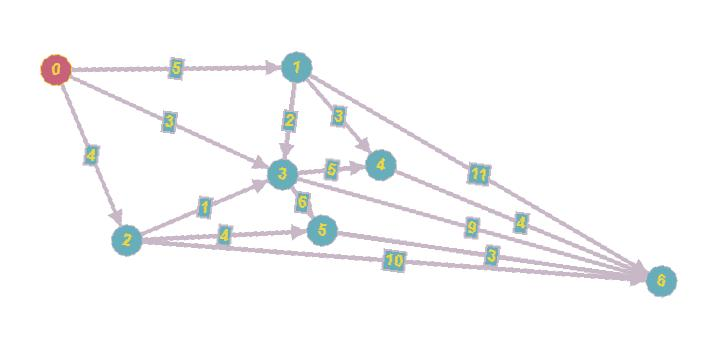

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [1]:
#Viaje por el rio - Programación dinámica
################################################################################
# Creo el diccionario de rutas basado en la foto
routes_photo = {
    '0': {'1': 5, '2': 4, '3': 3},
    '1': {'3': 2, '4': 3, '6': 11},
    '2': {'3': 1, '5': 4, '6': 10},
    '3': {'4': 5, '5': 6, '6': 9},
    '4': {'6': 4},
    '5': {'6': 3},
    '6': {}
}

# Creo diccionario de costes para ir guardando los costes de las rutas
costs = {}

# Creo función para calcular el coste de un punto a otro
# Esta función irá guardando en costs los costes que vaya calculando
def calculate_best_route(actual_pier, route, cost, routes):
    # Si el punto en el que estamos tiene conexiones, iteramos
    if len(routes[actual_pier].keys()) > 0:
        # Itero sobre todas las conexiones de este punto
        for next_pier, price in routes[actual_pier].items():
            # Para cada iteración, vuelvo a calcular el coste al siguiente punto, si lo tiene
            # Si no tiene conexiones, guardo el coste de la ruta completa en costs (else)
            calculate_best_route(next_pier, route+next_pier, cost+price, routes)
    else:
        costs[route] = cost
    return 
        

calculate_best_route('0', '0', 0, routes_photo)
costs = dict(sorted(costs.items(), key=lambda item: item[1]))
print("La mejor ruta para llegar al destino es:", list(costs.keys())[0])


# Quito el enlace de 0 a 2 que, según la ejecución anterior, es el inicio del camino más corto encontrado
routes_variation = {
    '0': {'1': 5, '3': 3},
    '1': {'3': 2, '4': 3, '6': 11},
    '2': {'3': 1, '5': 4, '6': 10},
    '3': {'4': 5, '5': 6, '6': 9},
    '4': {'6': 4},
    '5': {'6': 3},
    '6': {}
}
costs = {}
calculate_best_route('0', '0', 0, routes_variation)
costs = dict(sorted(costs.items(), key=lambda item: item[1]))
print("La mejor ruta para llegar al destino es que no sea por la ruta 0->2 es:", list(costs.keys())[0])

La mejor ruta para llegar al destino es: 0256
La mejor ruta para llegar al destino es que no sea por la ruta 0->2 es: 0146


## Descenso del gradiente

In [2]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [3]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

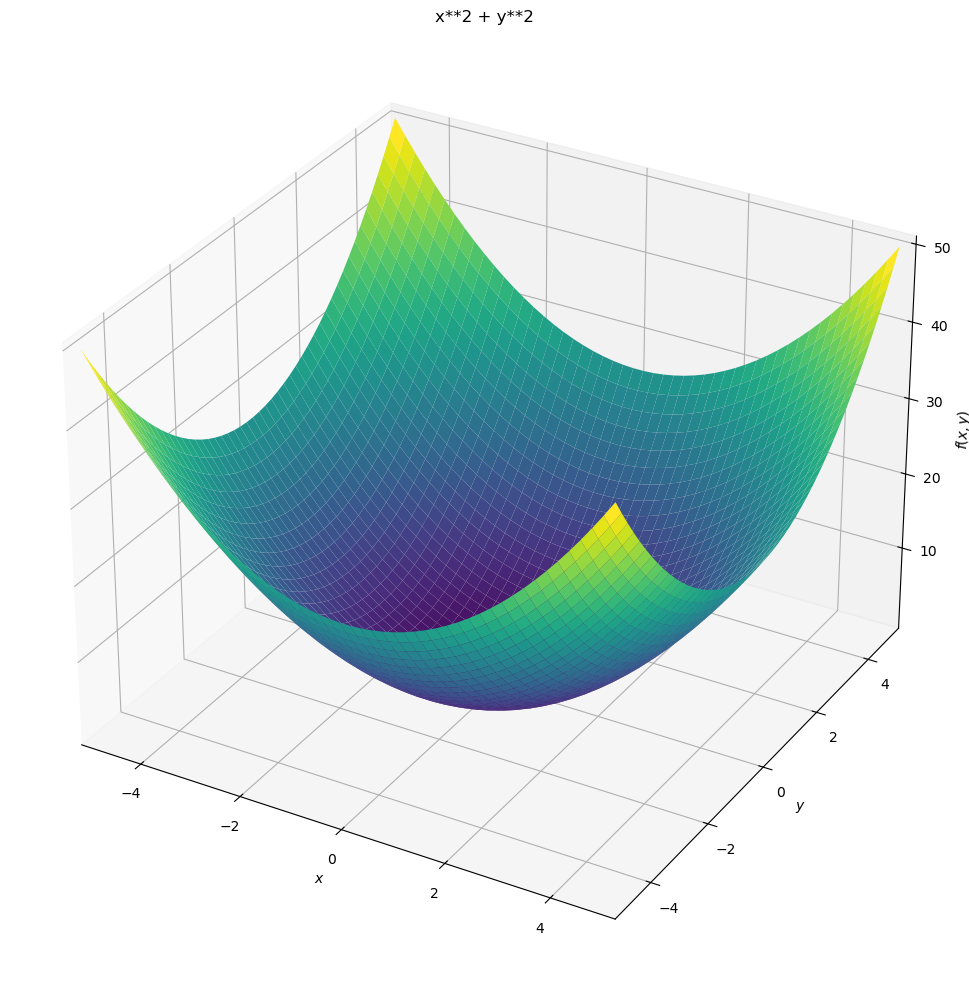

In [4]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

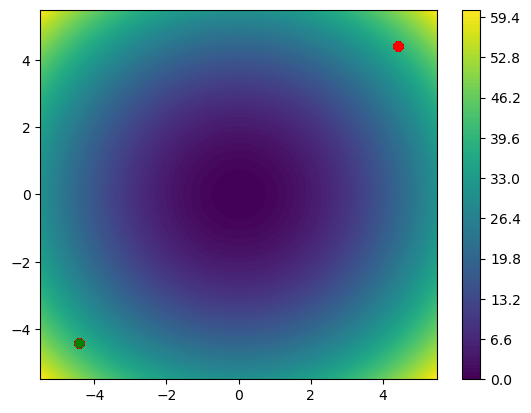

Solucion: [-4.416148864529767, -4.417209596552508] 39.01411141356312


In [5]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
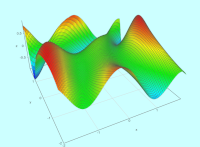


In [6]:
#Definimos la funcion
f = lambda X: math.sin(1/2*X[0]**2-1/4*X[1]**2+3) *math.cos(2*X[0]+1-math.exp(X[1]))
df = lambda X: [
    X[0]*math.cos(2*X[0]+1-math.exp(X[1]))*math.cos(1/2*X[0]**2-1/4*X[1]**2+3)-2*math.sin(2*X[0]+1-math.exp(X[1]))*math.sin(1/2*X[0]**2-1/4*X[1]**2+3),
    math.exp(X[1])*math.sin(2*X[0]+1-math.exp(X[1]))*math.sin(1/2*X[0]**2-1/4*X[1]**2+3)-(X[1]/2)*math.cos(2*X[0]+1-math.exp(X[1]))*math.cos(1/2*X[0]**2-1/4*X[1]**2+3)
]

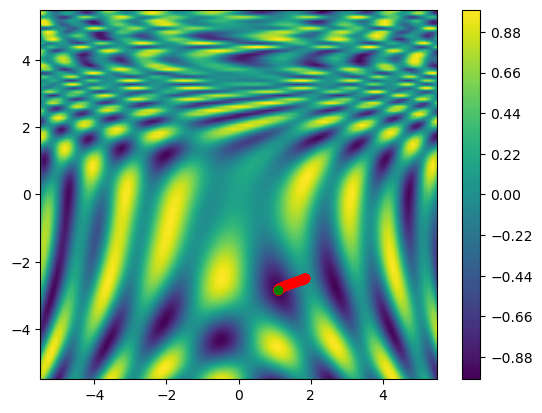

Solucion P: [1.0996536609614187, -2.8522431208114494] -0.9999999999999973


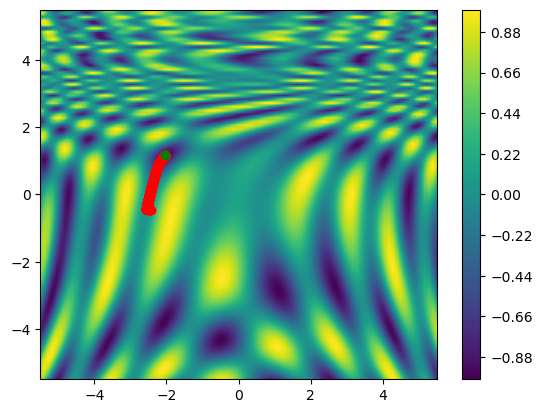

Solucion P: [-2.027655369949463, 1.1718231318844012] -0.9999999999272979


In [8]:
def calculate_gradient(P):
    # Prepara los datos para dibujar mapa de niveles de Z
    resolucion = 100
    rango=5.5
    
    X = np.linspace(-rango,rango,resolucion)
    Y = np.linspace(-rango,rango,resolucion)
    Z = np.zeros((resolucion,resolucion))
    for ix, x in enumerate(X):
      for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])
    
    # Pinta el mapa de niveles de Z
    plt.contourf(X, Y, Z, resolucion)
    plt.colorbar()
    
    # Generamos un punto aleatorio inicial y pintamos de blanco
    plt.plot(P[0], P[1], "o", c="white")
    
    # Tasa de aprendizaje.
    TA = 0.01
    
    # Iteraciones
    for _ in range(1000):
      grad = df(P)
      P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
      plt.plot(P[0], P[1], "o", c="red")
    
    # Dibujamos el punto final y pintamos de verde
    plt.plot(P[0], P[1], "o", c="green")
    plt.show()
    print("Solucion P:", P, f(P))

calculate_gradient([random.uniform(-5, 5), random.uniform(-5, 5)])
calculate_gradient([random.uniform(-5, 5), random.uniform(-5, 5)])